In [ ]:
pip install easyocr

In [1]:
import easyocr
!pip install Pillow
from PIL import Image
!pip install pandas

import re
import pandas as pd
import mysql.connector


In [49]:




img1=r"C:\Users\kbrad\Downloads\1.png"
img2=r"C:\Users\kbrad\Downloads\2.png"
img3=r"C:\Users\kbrad\Downloads\3.png"
img4=r"C:\Users\kbrad\Downloads\4.png"
img5=r"C:\Users\kbrad\Downloads\5.png"

def show_card(img):
    image=Image.open(img)
    return image
connection=mysql.connector.connect(host="localhost",user="root",password="12345",database="bizcardproject")
mycursor=connection.cursor()

query1="""create table if not exists bizcard_info(Cardholder_name varchar(100) primary key,Designation varchar(50),Phone_number varchar(50),Website_url varchar(50),Email_Id varchar(50),Street_number	varchar(50),
        City varchar(50),State varchar(50),Pincode	int,Company_name varchar(50)
        )"""
mycursor.execute(query1)
connection.commit()

    


def card_reader(img):
   
    
    reader=easyocr.Reader(['en'])

    result=reader.readtext(img,detail=0,paragraph=True)

    result1=' '.join(result)
    result1=result1.replace(',','').replace(';','').replace('  ',' ')


    column={"Cardholder_name":[],"Designation":[],"Phone_number":[],"Website_url":[],"Email_Id":[],"Street_number":[],"City":[],"State":[],"Pincode":[],"Company_name":[]}

    data=result[0].split(' ')
    n=len(data)
    name=data[0]
    designation=''
    for i in range(1,n):
        designation=designation+data[i]+' '


    column["Cardholder_name"].append(name)

    designation=data[1]+data[2]
    column["Designation"].append(designation)

    phone_number=re.findall(r'[\+, ]\d{2,3}-\d{3}-\d{4}',result1)
    column["Phone_number"].append(phone_number[0])

    email=re.findall(r'\w+@\w+.\w+',result1)
    column["Email_Id"].append(email[0])

    web=re.findall(r'\w+[WWW,www].\w+.\w+',result1)
    website=' '.join(web).replace(' ','.')
    column["Website_url"].append(website)

    street=re.findall(r'\d+ \w+ [St]+',result1)
    column["Street_number"].append(street[0])

    pincode=re.findall(r'\d{6}',result1)
    column["Pincode"].append(pincode[0])

    state=re.findall(r'(\w+) \d{6}',result1)
    column["State"].append(state[0])

    city=re.findall(r'[St]+ (\w+)',result1)
    column["City"].append(city[0])


    company_name=result[-1]
    column["Company_name"].append(company_name)
    df=pd.DataFrame(column)

    


    try:
        rows=[]
        for index in df.index:
            row=tuple(df.loc[index].values)
            row=tuple([str(d) for d in row])
            rows.append(row)
        
            

            connection=mysql.connector.connect(host="localhost",user="root",password="12345",database="bizcardproject")
            mycursor=connection.cursor()

            insert_query1=""" insert into bizcard_info values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""
            mycursor.executemany(insert_query1,rows)
            connection.commit()
    except:
        pass
        

    return df
            





    


In [50]:
card_reader(r"C:\Users\kbrad\Downloads\5.png")



Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


,Cardholder_name,Designation,Phone_number,Website_url,Email_Id,Street_number,City,State,Pincode,Company_name
0,SANTHOSH,TechnicalManager,+123-456-1234,www.Suncom.Sun,hello@Sun.com,123 ABC St,Tirupur,TamilNadu,641603,Sun Electricals


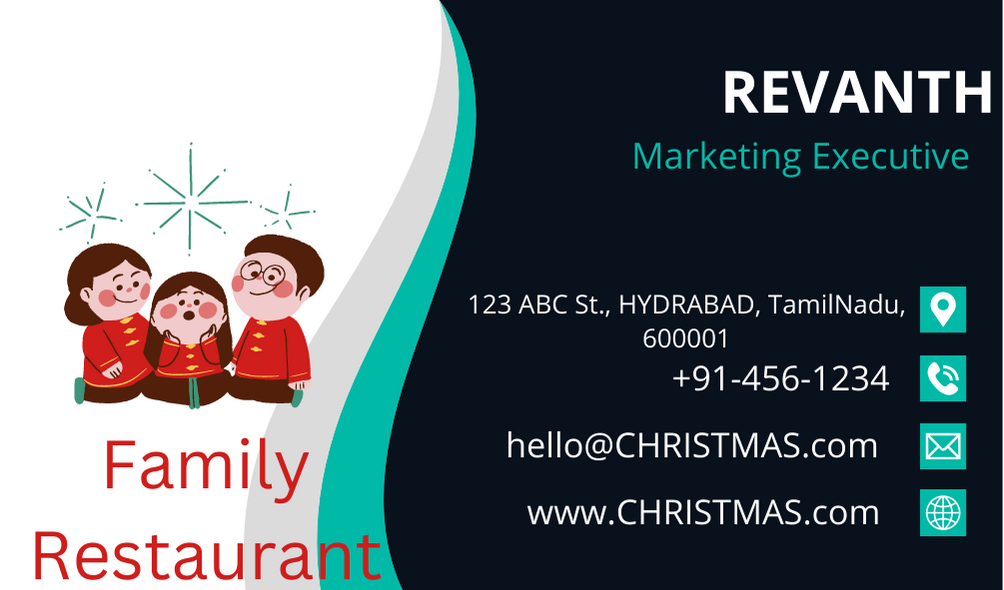

In [10]:
show_card(r"C:\Users\kbrad\Downloads\4.png")

In [ ]:
mycursor.execute("select Cardholder_name,Designation,Phone_number,Website_url,Email_Id,Street_number,City,State,Pincode,Company_name from bizcard_info where Cardholder_name='Amit'")

result=mycursor.fetchall()
df=pd.DataFrame(result,columns=["Cardholder_name","Designation","Phone_number","Website_url","Email_Id","Street_number","City","State","Pincode","Company_name"])
df
list=[]
for res in df:
    list.append(res)





In [38]:
def fetch_data_by_name(connection,Cardholder_name):
     
    connection=mysql.connector.connect(host="localhost",user="root",password="12345",database="bizcardproject")
    mycursor=connection.cursor()
    query1="select Cardholder_name,Designation,Phone_number,Website_url,Email_Id,Street_number,City,State,Pincode,Company_name from bizcard_info where Cardholder_name=%s"
    value=(Cardholder_name, )
    mycursor.execute(query1,value)
    q1=mycursor.fetchall()
    df1=pd.DataFrame(q1,columns=["Cardholder_name","Designation","Phone_number","Website_url" ,"Email_Id" ,"Street_number","City","State" ,"Pincode","Company_name" ])
    return q1

In [46]:
df=fetch_data_by_name(connection,'Amit')

list=[]
for res in df[0]:
    list.append(res)
list[1]


'CEO&FOUNDER'